# Speed / Velocity plots

## 1. Libraries import

In [2]:
source('lib_import.R')
source('setup.R') 
library(gridExtra)
library(latex2exp)
library(tidysdm)

[1] "setting up ggplot theme and colours"


## 2. Velocity data import

In [3]:
source('velocity_data_import.R')

df.v.merged$depth.raw <- df.v.merged$depth
df.v.merged$depth <- factor(paste0(df.v.merged$depth," [m]"),levels=c("7 [m]","10 [m]","15 [m]","25 [m]"),ordered=TRUE)

cn <- colnames(df.v.merged)
cn[match("point",cn)] <- "site"
colnames(df.v.merged) <- cn

[1] "reading velocities"
[1] "* * * * * * * Part 1 * * * * * * * *"
[1] "cleaning velocity dataframe"
[1] "* * * * * * * Part 2 * * * * * * * *"
[1] "removing imroper values form v2"
[1] "creating month-year factor for df.v and df.v2"
[1] "Finished creating df.v and df.v2 data frames."
[1] "Creatng merged data frame: df.v.merged"


`summarise()` has grouped output by 'point'. You can override using the
`.groups` argument.


In [4]:
velocity.colors <- c('velocity N'='darksalmon', 'velocity E'='darkorchid')
velocity.labels <- c('velocity N'='velocity N', 'velocity E'="velocity E")

## 3. Sea current speed
### 3.1. Summary statistics data frame

In [5]:
df.summary <- df.v.merged %>% group_by(site,depth) %>% summarise(mean=mean(speed,na.rm = TRUE),
                                                           min=min(speed,na.rm = TRUE),
                                                           max=max(speed,na.rm = TRUE),
                                                           sd=sd(speed,na.rm = TRUE))
# values (coordinates) for displaying the text on the plot
df.summary["rel.x"] <- as.POSIXct("2022-08-01 00:00:00 GMT", origin="1899-12-30", tz="GMT")
df.summary["rel.y"] <- 140.0
df.summary

`summarise()` has grouped output by 'site'. You can override using the
`.groups` argument.


site,depth,mean,min,max,sd,rel.x,rel.y
<fct>,<ord>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dbl>
GF,7 [m],9.884731,0.01,120.00,23.173538,2022-08-01,140
GF,10 [m],5.871352,0.00,102.65,5.692742,2022-08-01,140
GF,15 [m],5.224151,0.01,110.14,5.974494,2022-08-01,140
GF,25 [m],4.976919,0.00,106.60,5.073074,2022-08-01,140
H,7 [m],7.840339,0.02,186.33,8.277364,2022-08-01,140
H,10 [m],5.647281,0.01,83.50,5.557450,2022-08-01,140
H,15 [m],4.805197,0.01,90.68,4.728010,2022-08-01,140
H,25 [m],4.293979,0.01,117.05,5.200045,2022-08-01,140
S1,7 [m],3.154174,0.01,115.06,3.117902,2022-08-01,140


### 3.2. Sea current speed plot with basic statistics

Warning message:
"Removed 109812 rows containing missing values or values outside the scale range
(`geom_line()`)."


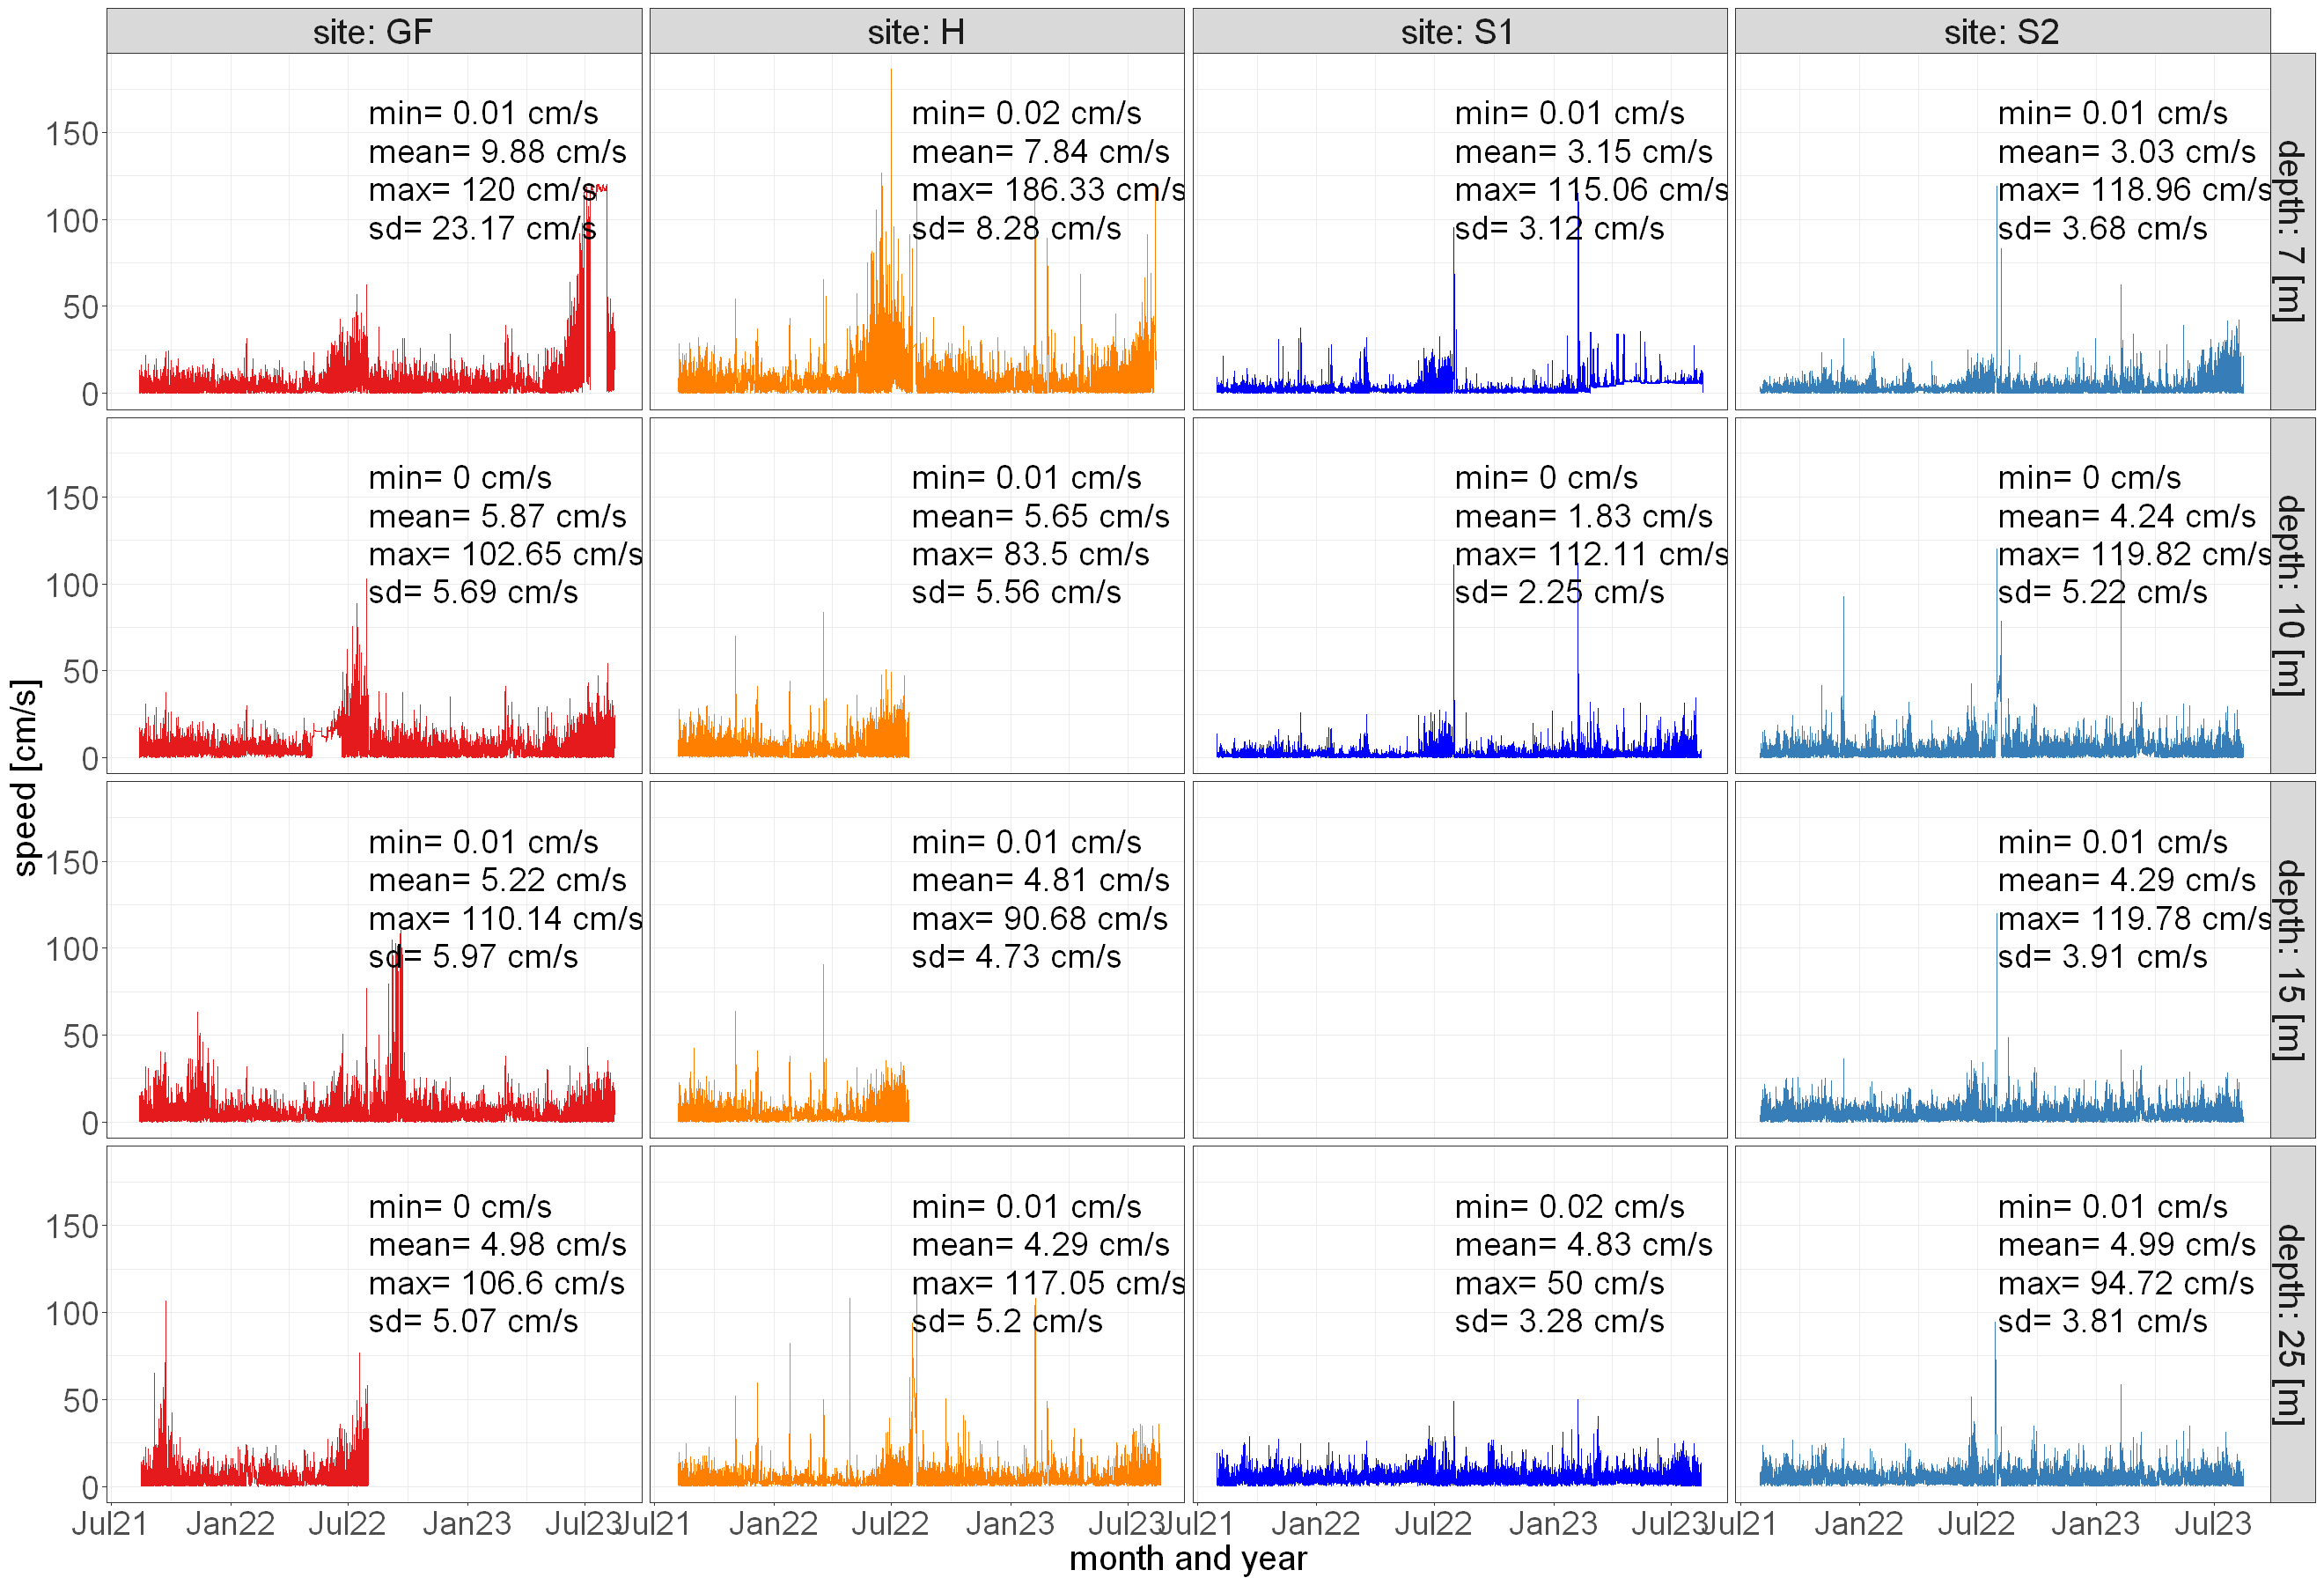

In [6]:
options(repr.plot.height=15,repr.plot.width=22)

r.d <- 2 # significant digits in rounding

ggplot(df.v.merged,aes(x=date_time,y=speed,col=site)) + geom_line()  + 

geom_text(data=df.summary,aes(x=rel.x,y=rel.y+22,label=paste("min=", as.character(round(min,r.d)),"cm/s")),size=8,hjust = 0,color="black") + 
geom_text(data=df.summary,aes(x=rel.x,y=rel.y,label=paste("mean=", as.character(round(mean,r.d)),"cm/s")),size=8,hjust = 0,color="black") + 
geom_text(data=df.summary,aes(x=rel.x,y=rel.y-22,label=paste("max=", as.character(round(max,r.d)),"cm/s")),size=8,hjust = 0,color="black") + 
geom_text(data=df.summary,aes(x=rel.x,y=rel.y-44,label=paste("sd=", as.character(round(sd,r.d)),"cm/s")),size=8,hjust = 0,color="black") + 

xlab("month and year") + ylab("speed [cm/s]") + 
facet_grid(depth~site,labeller = label_both) + 
scale_color_manual(values=pts.color) + 
scale_x_datetime(date_labels = "%b%y") +
theme(  axis.title.x = element_text(size = 24),
        axis.text.x = element_text(size=22),
        axis.title.y = element_text(size = 24),
        axis.text.y = element_text(size = 22),           
         strip.text = element_text(size = 24),
        legend.position="none" )

## 4. Velocity components
### 4.1. Velocity components summary statistics
N - northern component

E - eastern component


In [7]:
df.summary <- df.v.merged %>% group_by(site,depth) %>% summarise(
                                                           meanN=mean(velocityN,na.rm = TRUE),
                                                           minN=min(velocityN,na.rm = TRUE),
                                                           maxN=max(velocityN,na.rm = TRUE),
                                                           sdN=sd(velocityN,na.rm = TRUE),

                                                           meanE=mean(velocityE,na.rm = TRUE),
                                                           minE=min(velocityE,na.rm = TRUE),
                                                           maxE=max(velocityE,na.rm = TRUE),
                                                           sdE=sd(velocityE,na.rm = TRUE)
)
# values (coordinates) for displaying the text on the plot
df.summary["rel.x"] <- as.POSIXct("2022-06-01 00:00:00 GMT", origin="1899-12-30", tz="GMT")
df.summary["rel.y"] <- 140.0

df.summary

`summarise()` has grouped output by 'site'. You can override using the
`.groups` argument.


site,depth,meanN,minN,maxN,sdN,meanE,minE,maxE,sdE,rel.x,rel.y
<fct>,<ord>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dbl>
GF,7 [m],-1.4236138,-74.23,82.42,6.720938,5.699076186,-58.11,119.90,23.559382,2022-06-01,140
GF,10 [m],-0.7157331,-84.19,55.13,5.875508,2.210531382,-34.55,98.88,5.192283,2022-06-01,140
GF,15 [m],-0.7358517,-98.33,94.82,6.267364,1.709965837,-56.24,102.84,4.499013,2022-06-01,140
GF,25 [m],-1.3801515,-76.98,38.90,5.027940,0.094502424,-69.08,75.56,7.888379,2022-06-01,140
H,7 [m],0.3141625,-106.23,118.47,4.377242,-0.191340992,-119.35,123.25,10.513474,2022-06-01,140
H,10 [m],0.6842750,-21.41,41.18,3.007450,0.414369541,-33.78,82.44,7.286463,2022-06-01,140
H,15 [m],0.5401269,-15.21,26.45,2.471888,0.006878760,-39.93,90.67,6.248373,2022-06-01,140
H,25 [m],0.9385537,-96.03,116.18,3.163749,0.766522895,-113.83,109.59,5.831031,2022-06-01,140
S1,7 [m],-1.4190562,-84.63,111.27,3.480356,0.354333080,-92.88,77.78,2.327638,2022-06-01,140


### 4.2. Northern velocity component time series plot

Warning message:
"Removed 109327 rows containing missing values or values outside the scale range
(`geom_line()`)."


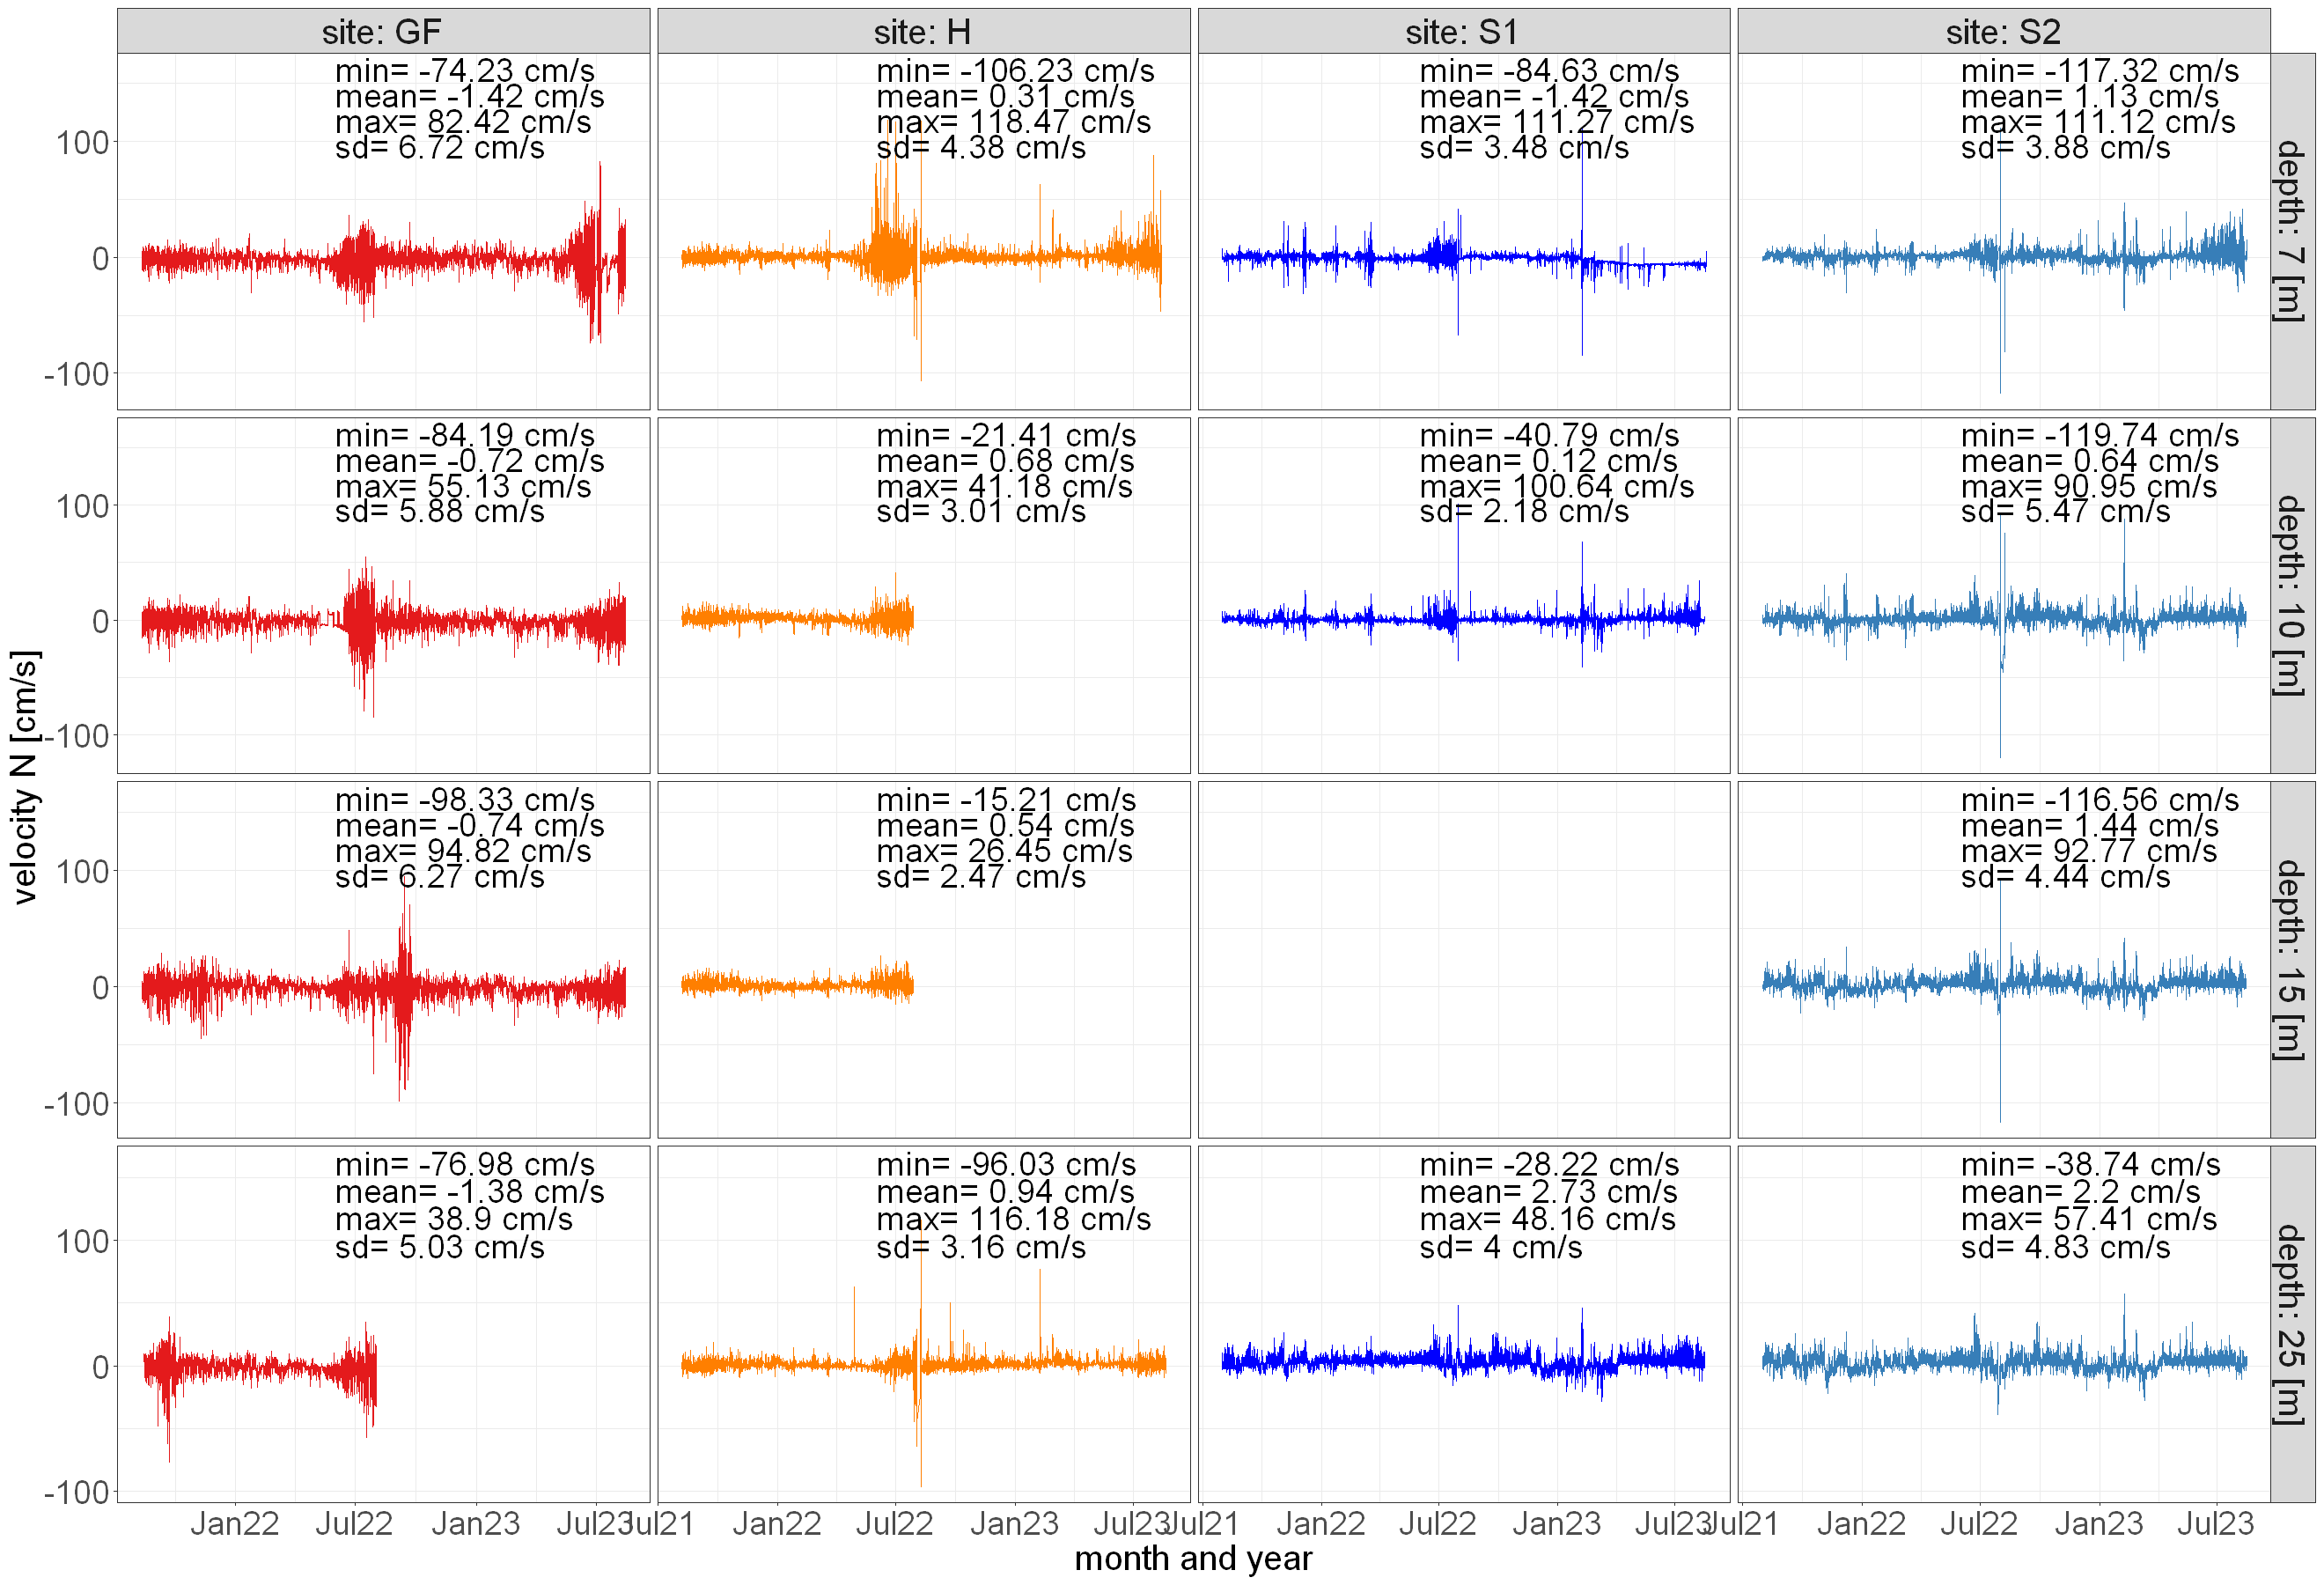

In [8]:
feat.label <- "velocity N [cm/s]"
feat <- "velocityN"

options(repr.plot.width=22, repr.plot.height=15)
ggplot(df.v.merged,aes(x=date_time,y=get(feat),col=site)) + geom_line()  + 


geom_text(data=df.summary,aes(x=rel.x,y=rel.y+22,label=paste("min=", as.character(round(minN,r.d)),"cm/s")),size=8,hjust = 0,color="black") + 
geom_text(data=df.summary,aes(x=rel.x,y=rel.y,label=paste("mean=", as.character(round(meanN,r.d)),"cm/s")),size=8,hjust = 0,color="black") + 
geom_text(data=df.summary,aes(x=rel.x,y=rel.y-22,label=paste("max=", as.character(round(maxN,r.d)),"cm/s")),size=8,hjust = 0,color="black") + 
geom_text(data=df.summary,aes(x=rel.x,y=rel.y-44,label=paste("sd=", as.character(round(sdN,r.d)),"cm/s")),size=8,hjust = 0,color="black") +

 xlab("month and year") + ylab(feat.label) + 
facet_grid(depth~site,scales = "free",labeller = label_both) + 
scale_color_manual(values=pts.color) + 
scale_x_datetime(date_labels = "%b%y") +
theme(  axis.title.x = element_text(size = 24),
        axis.text.x = element_text(size=22),
        axis.title.y = element_text(size = 24),
        axis.text.y = element_text(size = 22),           
         strip.text = element_text(size = 24),
        legend.position="none" )

### 4.3. Eastern velocity component time series plot

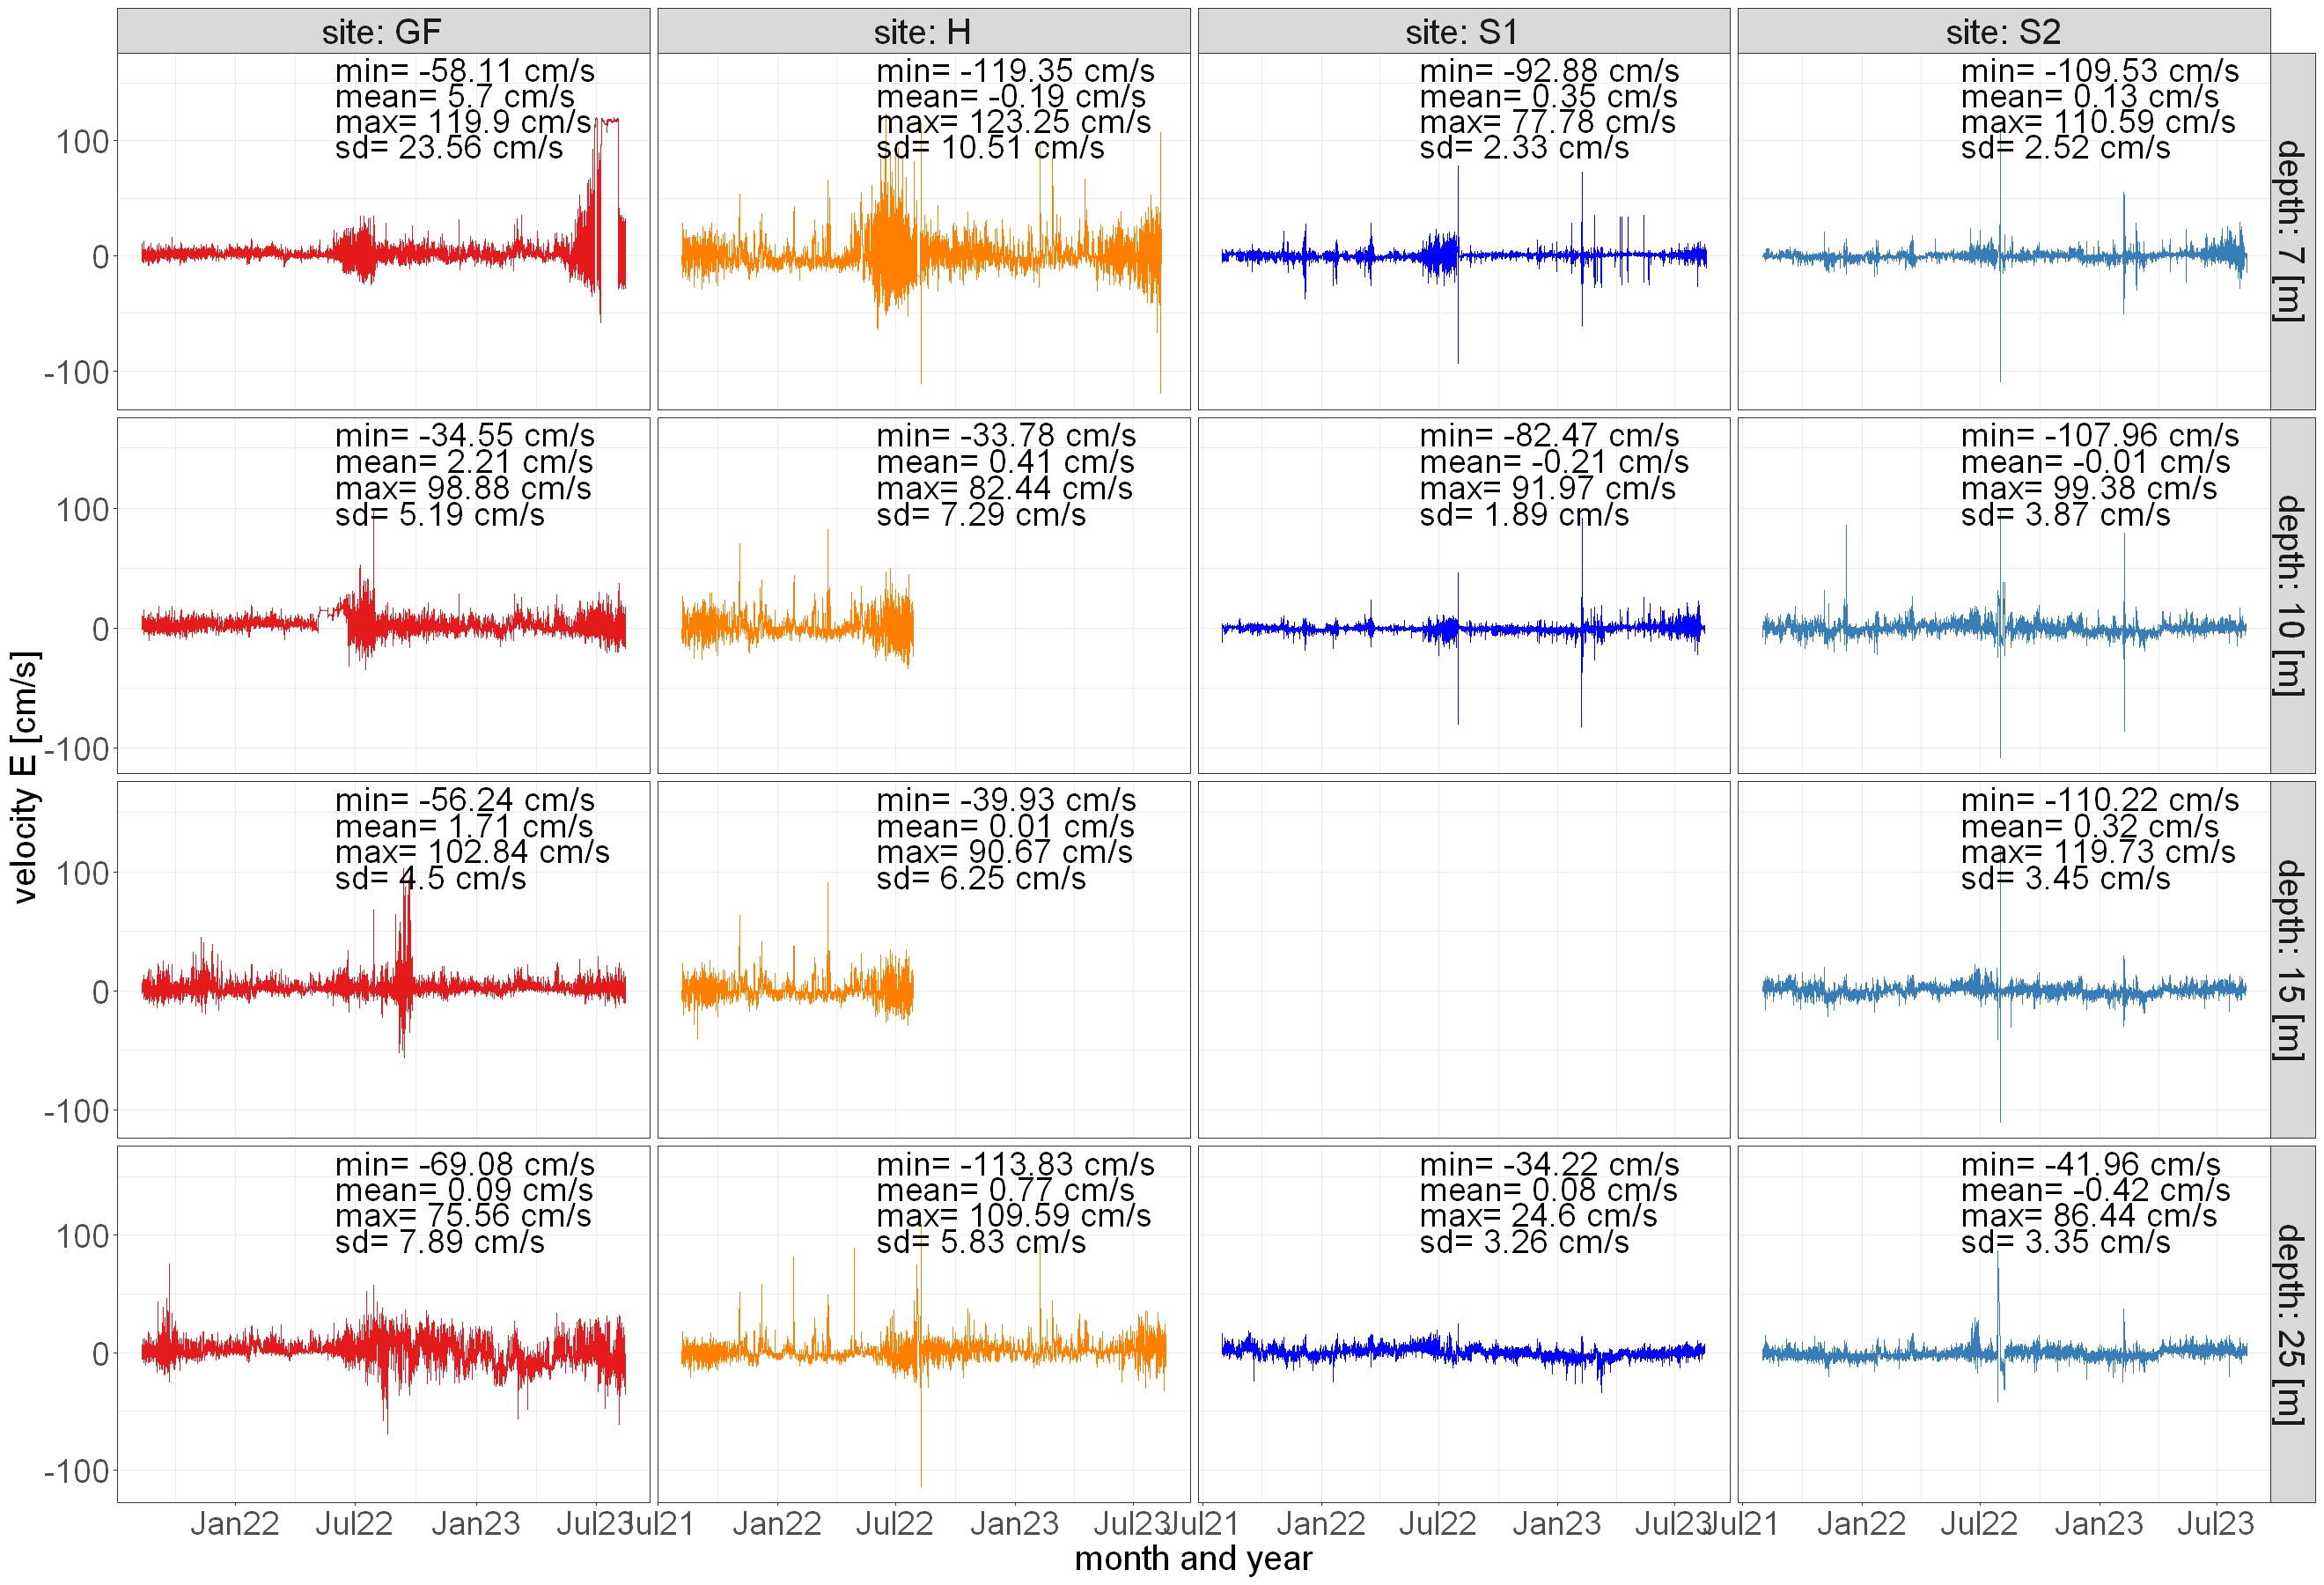

In [9]:
feat.label <- "velocity E [cm/s]"
feat <- "velocityE"

options(repr.plot.width=22, repr.plot.height=15)
ggplot(df.v.merged,aes(x=date_time,y=get(feat),col=site)) + geom_line()  + 

geom_text(data=df.summary,aes(x=rel.x,y=rel.y+22,label=paste("min=", as.character(round(minE,r.d)),"cm/s")),size=8,hjust = 0,color="black") + 
geom_text(data=df.summary,aes(x=rel.x,y=rel.y,label=paste("mean=", as.character(round(meanE,r.d)),"cm/s")),size=8,hjust = 0,color="black") + 
geom_text(data=df.summary,aes(x=rel.x,y=rel.y-22,label=paste("max=", as.character(round(maxE,r.d)),"cm/s")),size=8,hjust = 0,color="black") + 
geom_text(data=df.summary,aes(x=rel.x,y=rel.y-44,label=paste("sd=", as.character(round(sdE,r.d)),"cm/s")),size=8,hjust = 0,color="black") +

 xlab("month and year") + ylab(feat.label) + 
facet_grid(depth~site,scales = "free",labeller = label_both) + 
scale_color_manual(values=pts.color) + 
scale_x_datetime(date_labels = "%b%y") +
theme(  axis.title.x = element_text(size = 24),
        axis.text.x = element_text(size=22),
        axis.title.y = element_text(size = 24),
        axis.text.y = element_text(size = 22),           
         strip.text = element_text(size = 24),
        legend.position="none" )

### 4.4. Density (frequency) plot of the velocity values
The plot range is clipped to a range $[-50, 50]$ cm/s in each direction.

Warning message:
"Removed 109328 rows containing non-finite outside the scale range
(`stat_density2d()`)."
Warning message:
"Removed 109328 rows containing missing values or values outside the scale range
(`geom_point()`)."


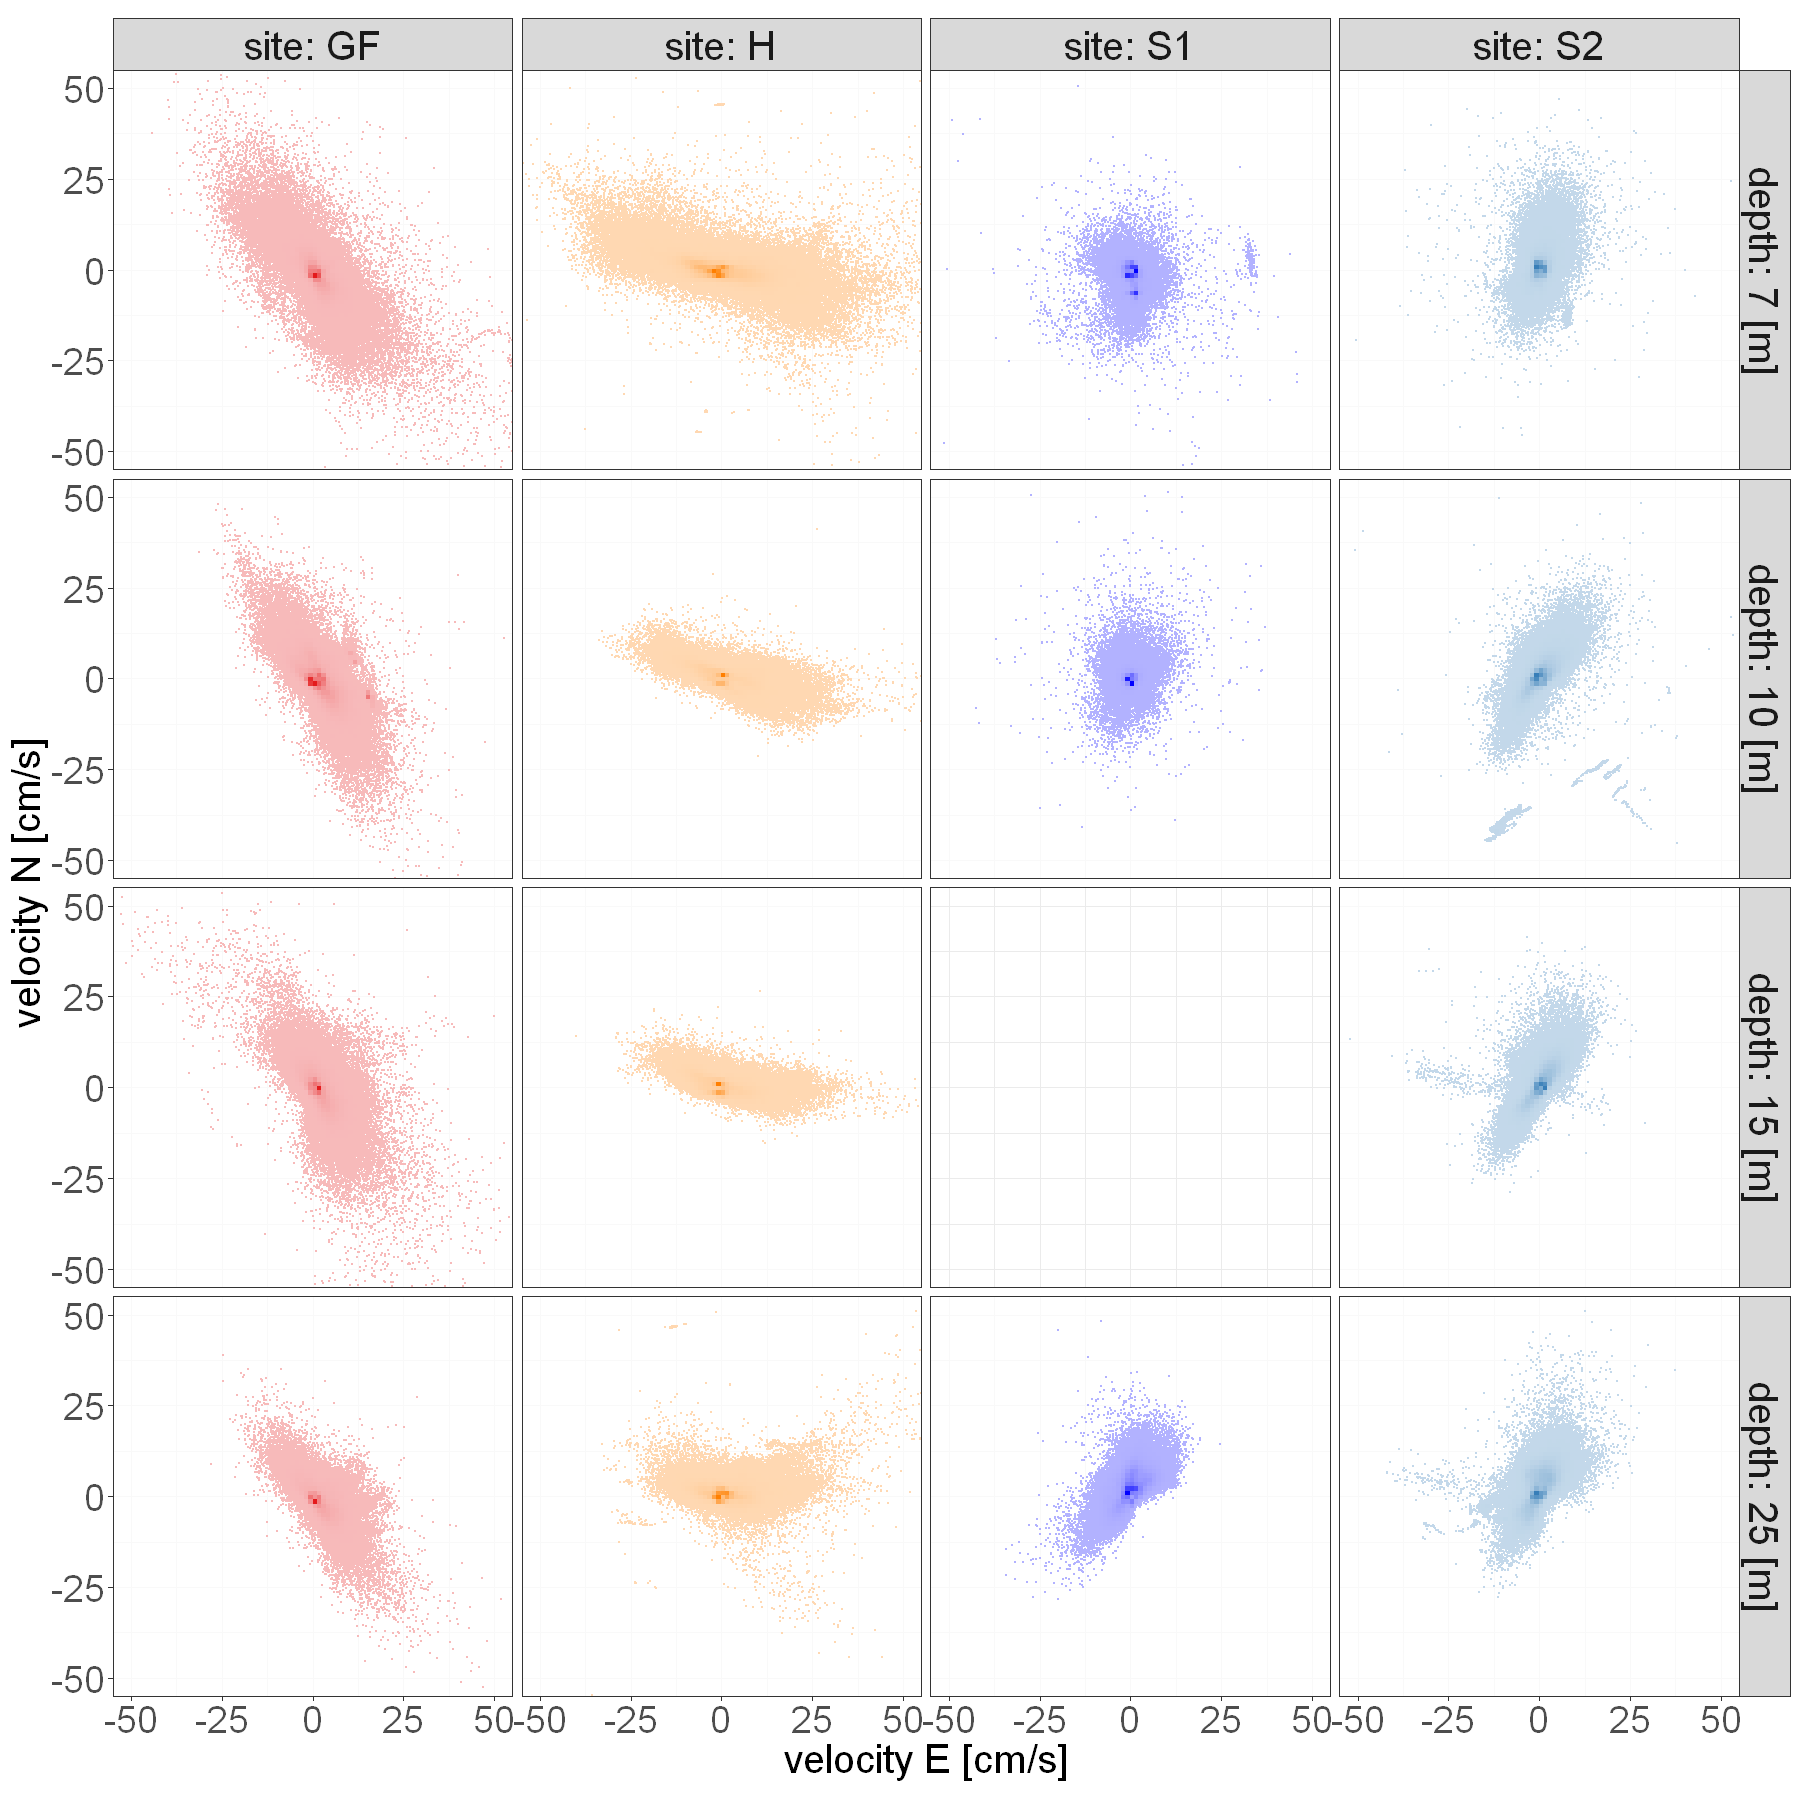

In [10]:
options(repr.plot.width=15,repr.plot.height=15)

v.rng = 50
ggplot(df.v.merged,aes(x=velocityE,y=velocityN,col=site)) +
geom_point(size=0.1) +
stat_density_2d(geom = "raster",n=200,aes(alpha = after_stat(1-ndensity)),contour = FALSE,fill="white")+ 
scale_alpha(range = c(0, 0.7)) + 
coord_fixed(ratio = 1, xlim = c(-v.rng,v.rng), ylim =c(-v.rng,v.rng), expand = TRUE, clip = "on") +
scale_color_manual(values=pts.color) +facet_grid(depth~site,labeller = label_both) +
xlab("velocity E [cm/s]") + ylab("velocity N [cm/s]") +
theme(  axis.title.x = element_text(size = 24),
        axis.title.y = element_text(size = 24),
        axis.text.y = element_text(size = 22),   
        axis.text.x = element_text(size = 22),
      legend.position="none",
     strip.text = element_text(size = 24))

### 4.5. Violin plots of velocity components
Preparing a data frame for violinplots

Warning message:
"Removed 171132 rows containing non-finite outside the scale range
(`stat_ydensity()`)."


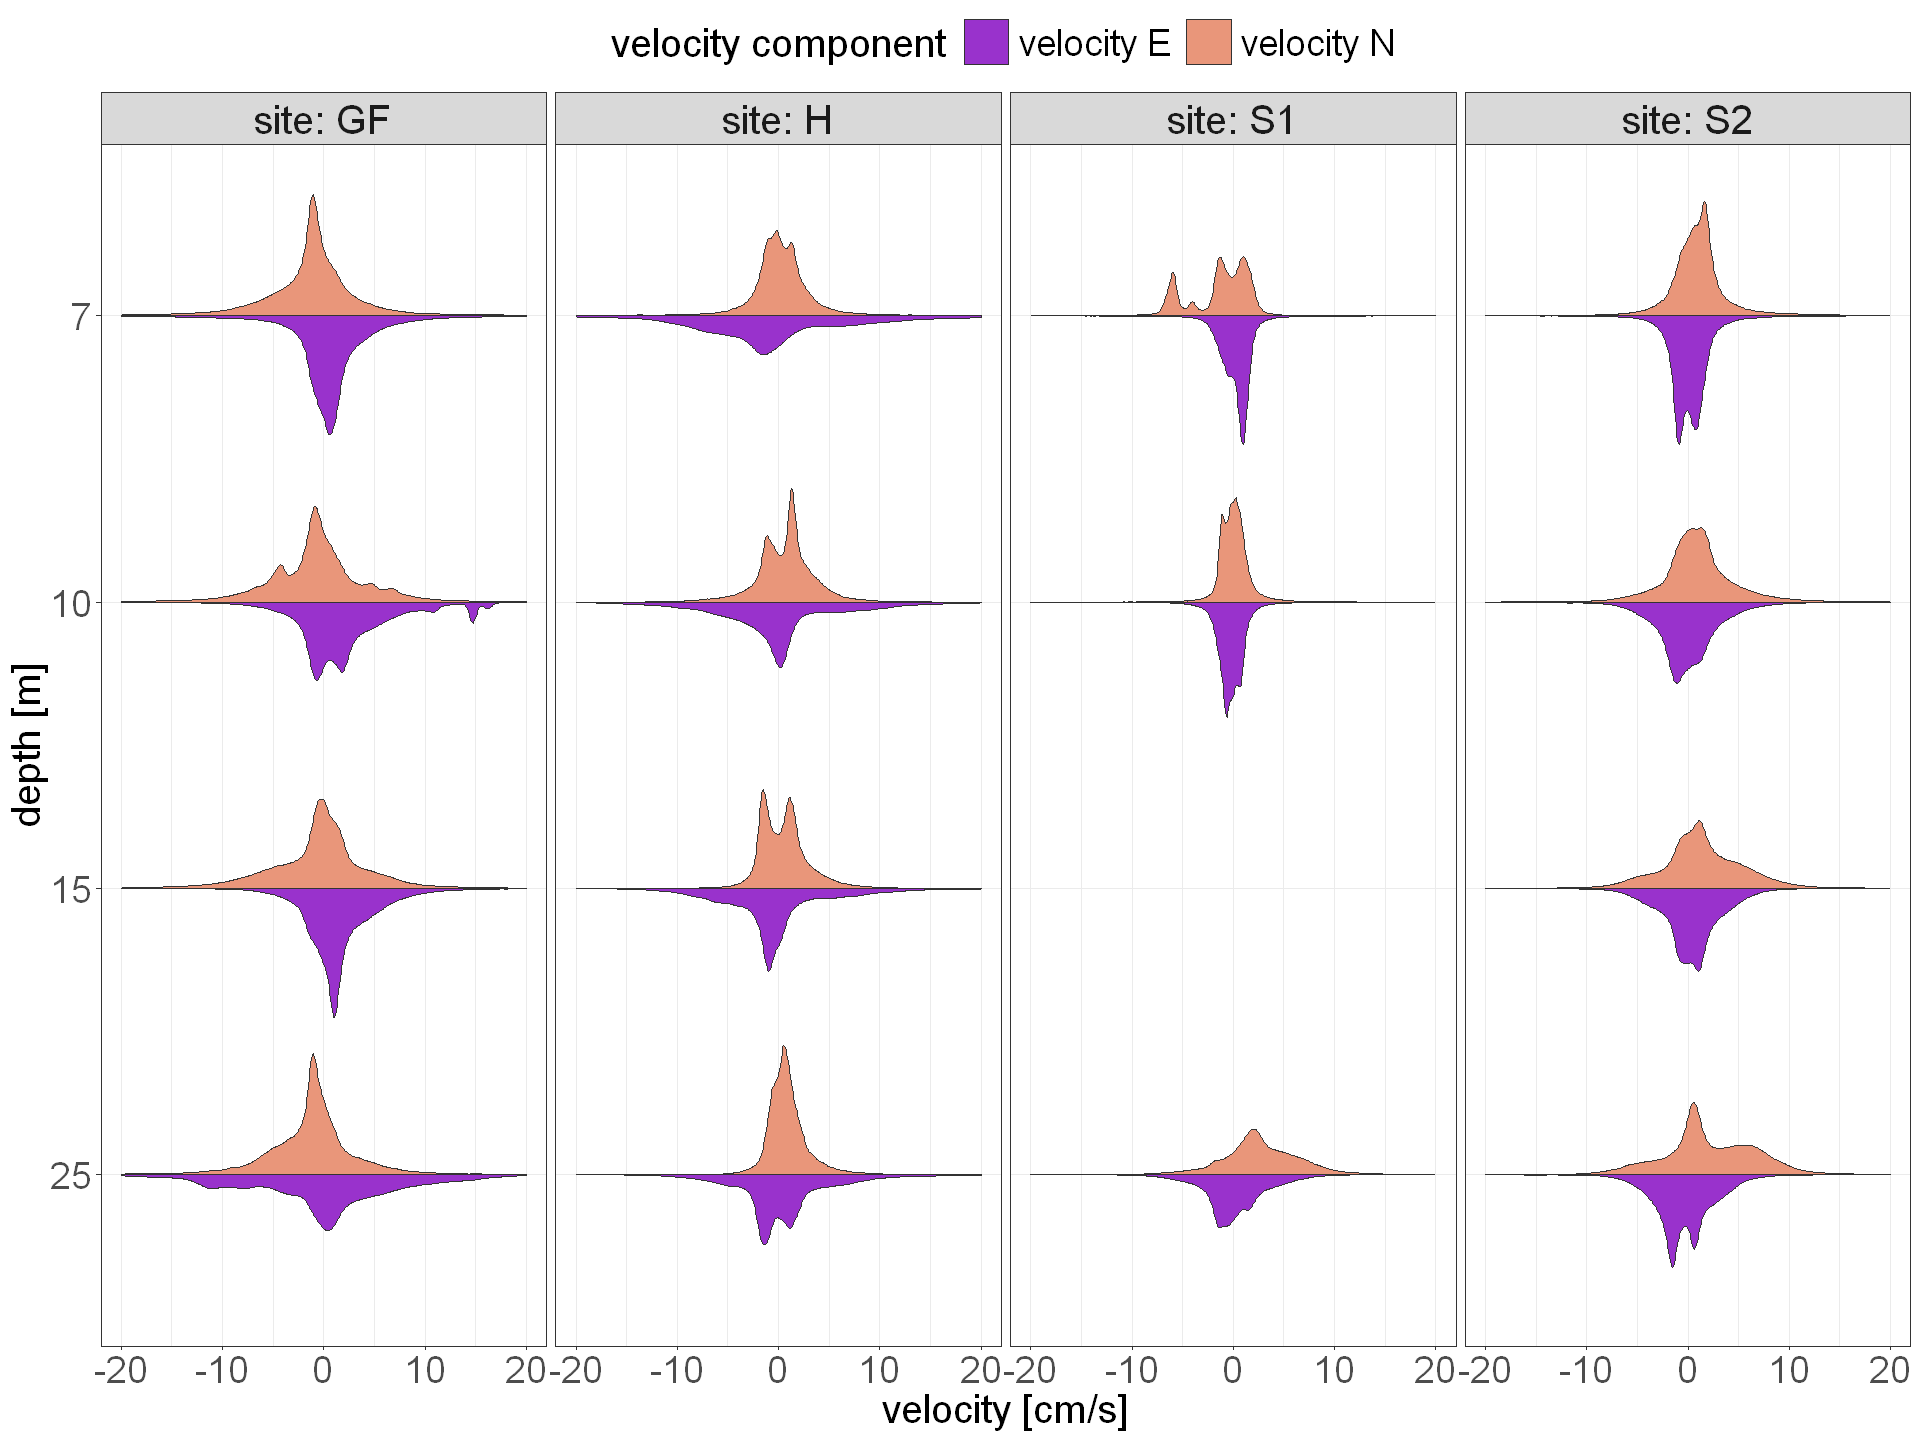

In [12]:
cnames <- colnames(df.v.merged)
tmp.dfN <- df.v.merged[cnames[-match(c('velocityN','velocityE'),cnames)]]
tmp.dfN["velocity"] <-  df.v.merged['velocityN']
tmp.dfN["component"] <- "velocity N"

tmp.dfE <- df.v.merged[cnames[-match(c('velocityN','velocityE'),cnames)]]
tmp.dfE["velocity"] <-  df.v.merged['velocityE']
tmp.dfE["component"] <- "velocity E"

tmp.dfNE <- rbind(tmp.dfN,tmp.dfE)
tmp.dfN <- NULL
tmp.dfE <- NULL

options(repr.plot.width=16,repr.plot.height=12)
ggplot(tmp.dfNE,aes(x=depth.raw,y=velocity,fill=component)) + geom_split_violin() + 
ylab("velocity [cm/s]")+ xlab("depth [m]")+
facet_wrap(~site,scales="free_x",labeller = label_both,nrow=1) +
scale_x_discrete(limits=rev) + scale_fill_manual(name="velocity component", values=velocity.colors,labels=velocity.labels)+
ylim(-20,20) + coord_flip() +
theme(  axis.title.x = element_text(size = 24),
        axis.text.x = element_text(size=22),
        axis.title.y = element_text(size = 24),
        axis.text.y = element_text(size = 22),           
        strip.text = element_text(size = 24),
        legend.position="top",
        legend.key.size = unit(1, 'cm'),
        legend.title = element_text(size=24), 
        legend.text = element_text(size=22)      
        )

### 4.6. Overlaying velocity components plot

Warning message:
"Removed 109327 rows containing missing values or values outside the scale range
(`geom_line()`)."


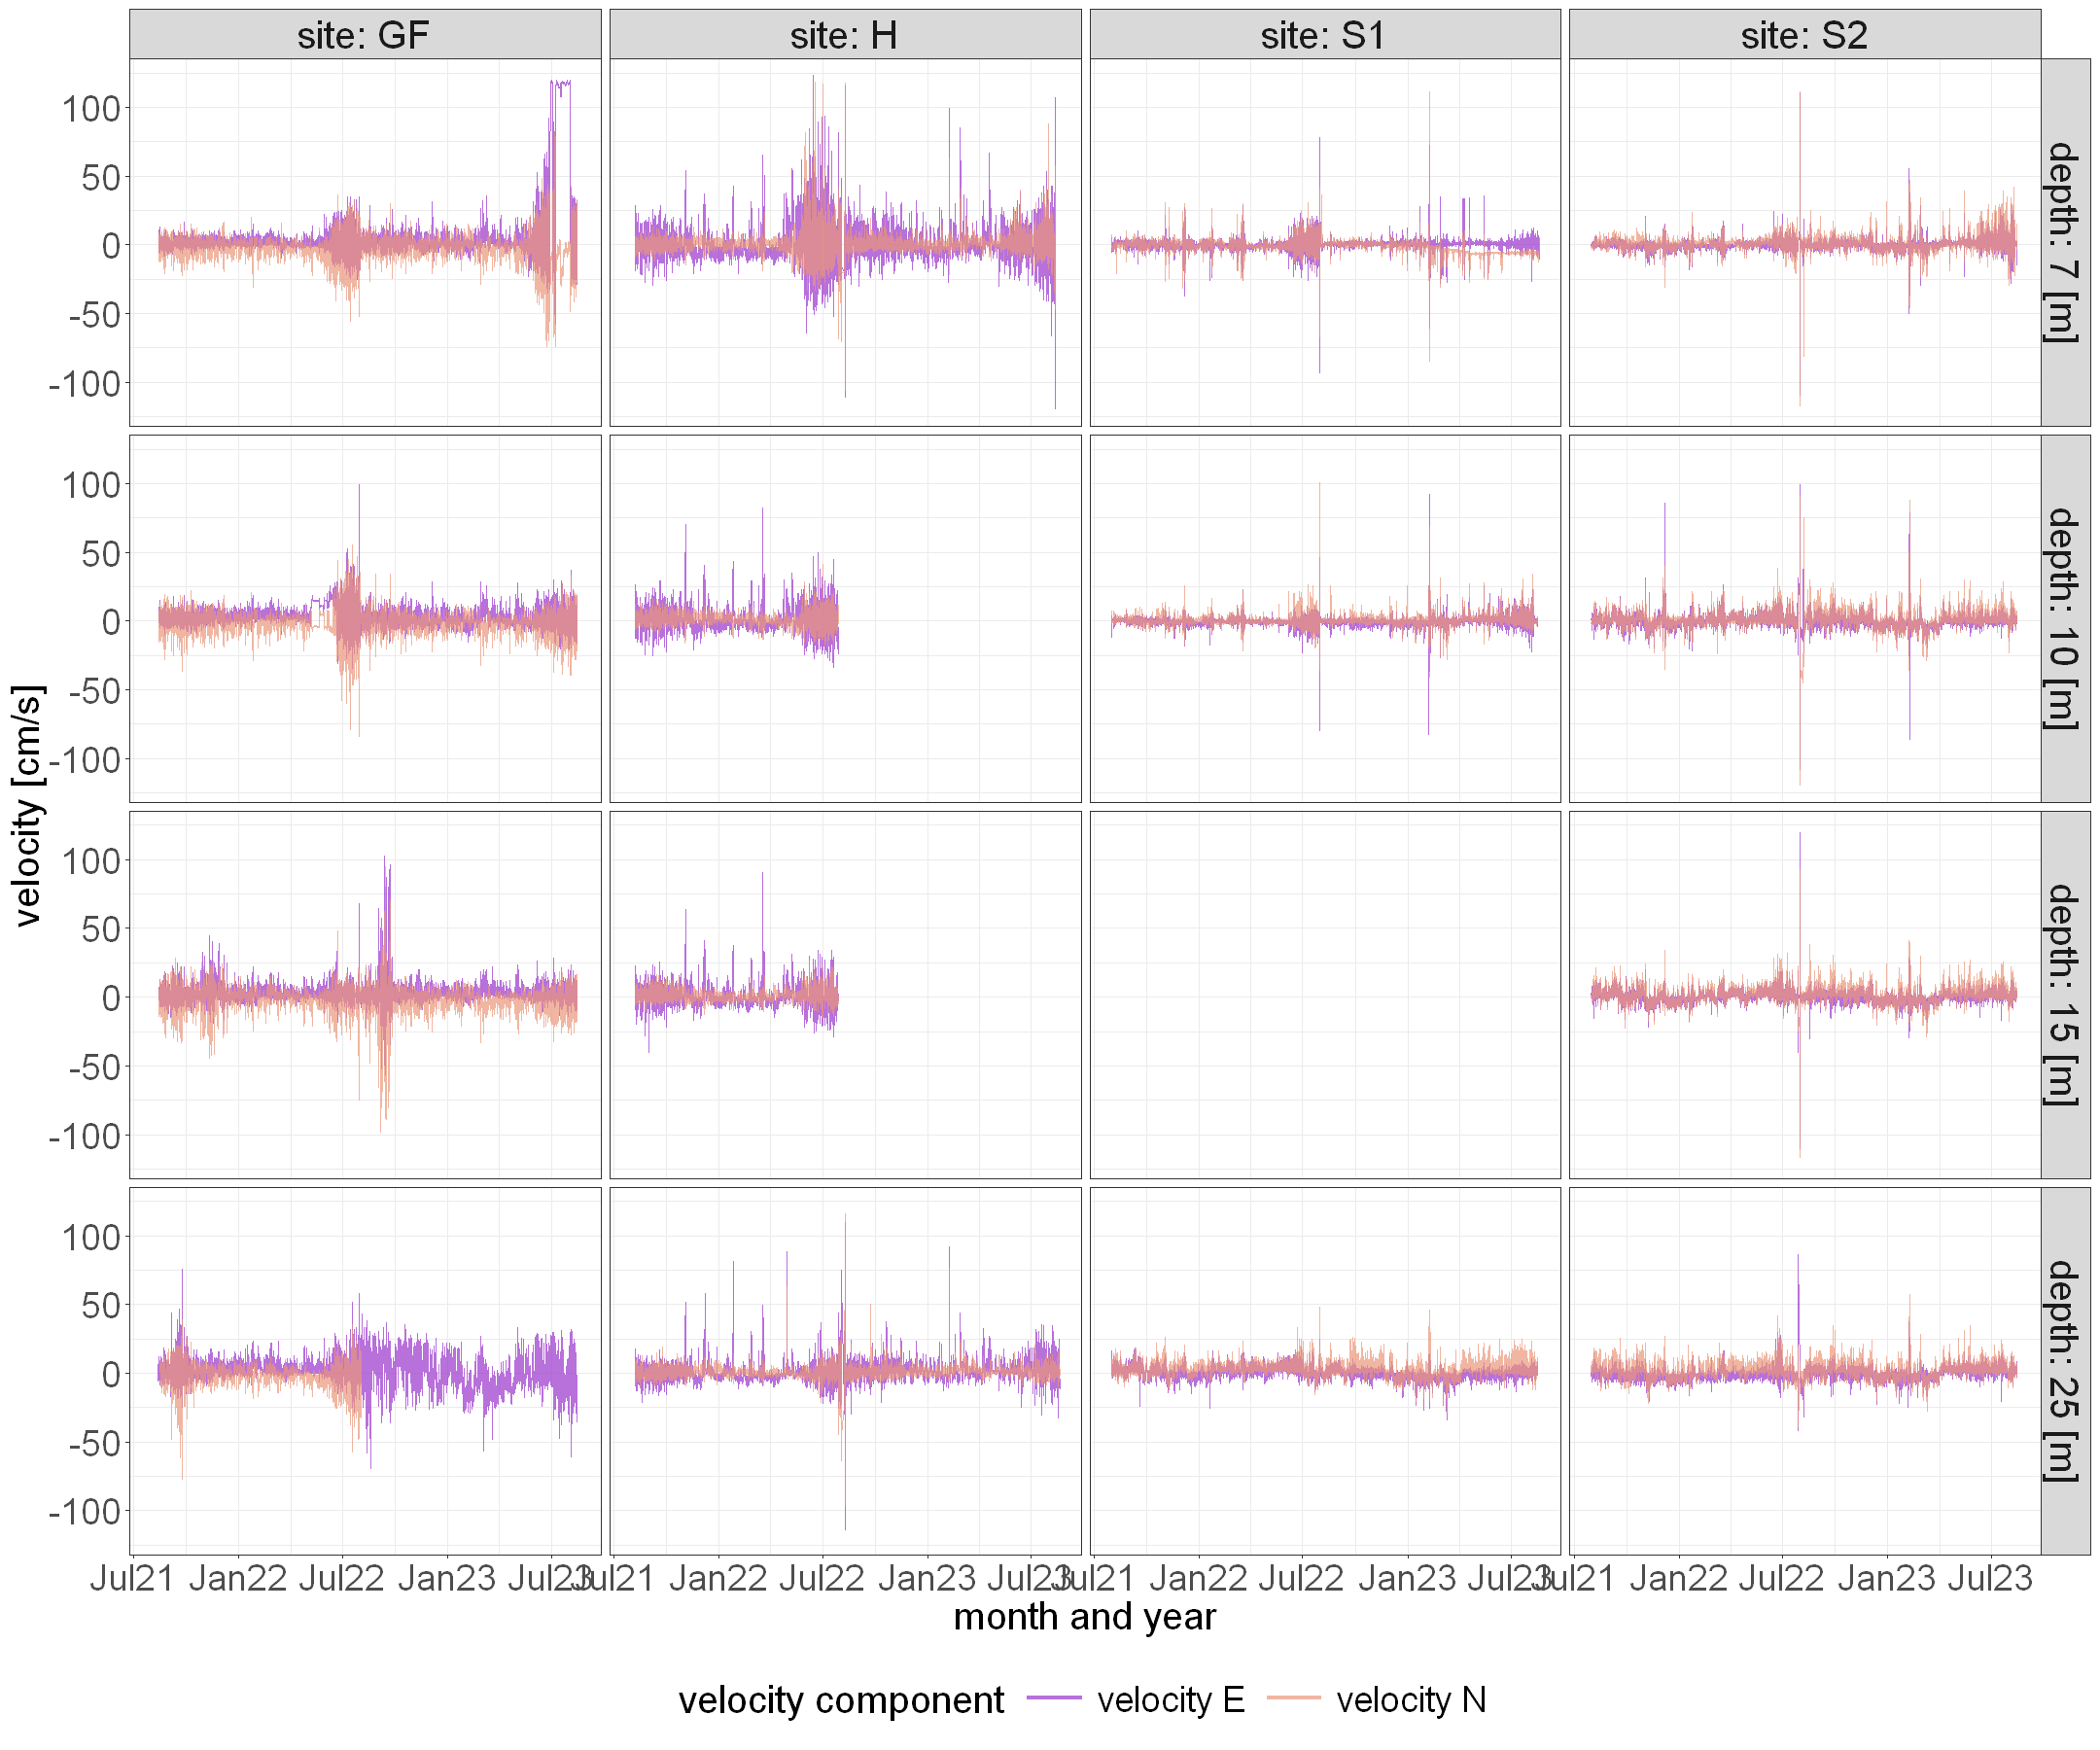

In [13]:
options(repr.plot.width=18, repr.plot.height=15)

ggplot(tmp.dfNE,aes(x=date_time,y=velocity)) +
geom_line(aes(color=component),linewidth=0.55,alpha=0.7)+
scale_color_manual(name="velocity component", values=velocity.colors,labels=velocity.labels)+

scale_x_datetime(date_labels = "%b%y") +
 
xlab("month and year") + ylab("velocity [cm/s]") + 
facet_grid(depth~site,labeller = label_both) + 
theme(  axis.title.x = element_text(size = 24),
        axis.text.x = element_text(size=22),
        axis.title.y = element_text(size = 24),
        axis.text.y = element_text(size = 22),           
         strip.text = element_text(size = 24),
        legend.position="bottom",
        legend.key.size = unit(1.5, 'cm'),
        legend.title = element_text(size=24), 
        legend.text = element_text(size=22) ) + guides(colour = guide_legend(override.aes = list(linewidth=1.2)))